In [ ]:
import s3fs
import pickle 
import pyarrow 
import os 
import sys
import pandas as pd 
import datetime 
import numpy as np
from pyarrow import parquet as pa 
import ison
from tensorflow import keras 
from tensorflow.keras import layers 
from matplotlib import pyplot as plt 
import pyspark.sql.functions as F
from keras.models import load_model
import seaborn as sn
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, plot, iplot 
import plotly.graph_objs as go 
import plotly.io as pio 
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.set_option('display.max_rows', None)

## KDE plot

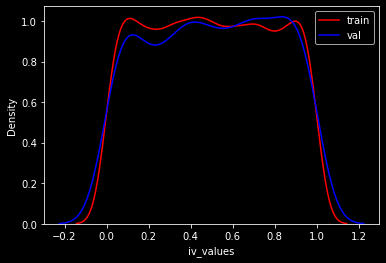

In [65]:
X_train_first_col = pd.read_csv('./X_train.csv', index_col=0).iloc[:, 0]
X_val_first_col = pd.read_csv('./X_val.csv', index_col=0).iloc[:, 0]
sn.kdeplot(X_train_first_col, color='r', label='train')
sn.kdeplot(X_val_first_col, color='b', label='val')
plt.xlabel("iv_values")
plt.legend()

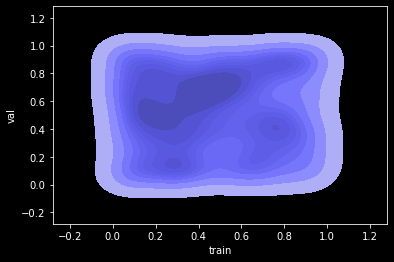

In [66]:
res = sn.kdeplot(X_train_first_col,X_val_first_col,color='b',shade=True)
plt.xlabel("train")
plt.ylabel("val")
plt.show()
del X_train_first_col,X_val_first_col

## STD

In [93]:
X_val = pd.read_csv('./X_val.csv', index_col=0).reset_index(drop = True)
AC0 = load_model('AC0')
AC1_1 = load_model('autoencoder_retrain_1')
AC1_2 = load_model ('autoencoder_retrain_2')
AC1_3 = load_model('autoencoder_retrain_3')


In [94]:
std_val = X_val.std(axis=1)
X_val = X_val.values

In [95]:
AC0_Pred = AC0.predict(X_val)
AC0_mae_loss = np.mean(np.abs(AC0_Pred - X_val), axis=1).flatten()

AC1_1_Pred = AC1_1.predict(X_val)
AC1_1_mae_loss = np.mean(np.abs (AC1_1_Pred - X_val), axis=1).flatten()

AC1_2_Pred = AC1_2.predict(X_val)
AC1_2_mae_loss = np.mean(np.abs(AC1_2_Pred - X_val), axis=1).flatten()

AC1_3_Pred = AC1_3.predict(X_val)
AC1_3_mae_loss = np.mean(np.abs(AC1_3_Pred - X_val), axis=1).flatten()


31/31 [==============================] - 0s 3ms/step


In [138]:
MAE_Comparison = pd.DataFrame({'AC0_MAE' :AC0_mae_loss, 'AC1_1_MAE': AC1_1_mae_loss, 'AC1_2_MAE':AC1_2_mae_loss,
                               'AC1_3_MAE' :AC1_3_mae_loss, 'std_val' : std_val})

In [133]:
STD_CUTOFF = 0.02
MAE_CUTOFF = 0.015

In [141]:
MAE_Comparison['AC0_Pos'] = MAE_Comparison['AC0_MAE'] > MAE_CUTOFF
MAE_Comparison['AC1_1_Pos'] = MAE_Comparison['AC1_1_MAE'] > MAE_CUTOFF
MAE_Comparison['AC1_2_Pos'] = MAE_Comparison['AC1_2_MAE'] > MAE_CUTOFF
MAE_Comparison['AC1_3_Pos'] = MAE_Comparison['AC1_3_MAE'] > MAE_CUTOFF
MAE_Comparison['STD_Pos'] = MAE_Comparison['std_val'] > STD_CUTOFF

### based on std_value

In [146]:

pd.crosstab(MAE_Comparison['AC0_Pos'] ,MAE_Comparison['STD_Pos'])

STD_Pos,True
AC0_Pos,
True,964


### based on models

In [147]:
pd.crosstab(MAE_Comparison['AC0_Pos'] ,MAE_Comparison['AC1_1_Pos'])

AC1_1_Pos,True
AC0_Pos,
True,964


In [148]:
pd.crosstab(MAE_Comparison["AC0_Pos"],MAE_Comparison['AC1_2_Pos'])

AC1_2_Pos,True
AC0_Pos,
True,964


In [149]:
pd.crosstab(MAE_Comparison['AC0_Pos'] ,MAE_Comparison['AC1_3_Pos'])

AC1_3_Pos,True
AC0_Pos,
True,964
